In [1]:
import os
import pandas as pd
import rdkit
from rdkit import RDLogger
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
from rdkit import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import Lipinski
from rdkit.Chem.Draw import IPythonConsole

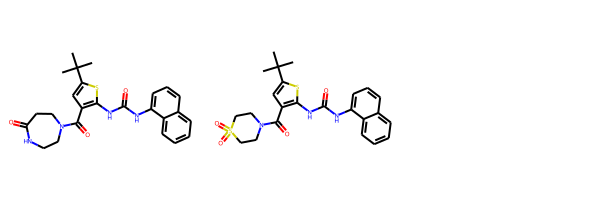

In [17]:
zes_mol = Chem.MolFromSmiles('CC(C)(C)c1cc(C(=O)N2CCNC(=O)CC2)c(NC(=O)Nc2cccc3ccccc23)s1')#'O=C(O)Cn1c(=O)n(Cc2ccc(Br)cc2F)c(=O)c2ccc(Cl)cc21')
_1ww_mol = Chem.MolFromSmiles('CC(C)(C)c1cc(C(=O)N2CCS(=O)(=O)CC2)c(NC(=O)Nc2cccc3ccccc23)s1')#'O=C(O)COc1cc(Cl)ccc1C(=O)NCc1ccc(I)cc1')

Draw.MolsToGridImage([zes_mol, _1ww_mol])

In [18]:
mcs = rdFMCS.FindMCS([zes_mol, _1ww_mol], matchValences=True)

((0, 1, 2, 3, 4, 5, 6, 17, 32, 18, 19, 20, 21, 22, 23, 24, 25, 26, 31, 30, 29, 28, 27, 7, 8, 9, 10, 11, 16, 15),)


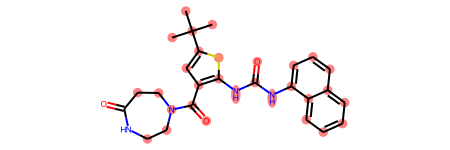

In [19]:
substructure = Chem.MolFromSmarts(mcs.smartsString)
print(zes_mol.GetSubstructMatches(substructure))
zes_mol

((0, 1, 2, 3, 4, 5, 6, 17, 32, 18, 19, 20, 21, 22, 23, 24, 25, 26, 31, 30, 29, 28, 27, 7, 8, 9, 10, 11, 16, 15),)


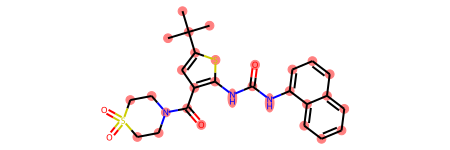

In [20]:
print(_1ww_mol.GetSubstructMatches(substructure))
_1ww_mol

((1, 4), (6, 7), (7, 9), (17, 18), (18, 19), (19, 21), (21, 22))


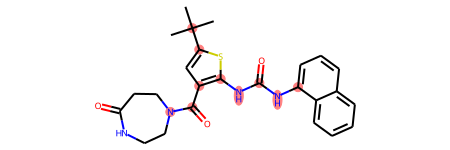

In [21]:
substructure = Lipinski.RotatableBondSmarts
print(zes_mol.GetSubstructMatches(substructure))
zes_mol

((1, 4), (6, 7), (7, 9), (17, 18), (18, 19), (19, 21), (21, 22))


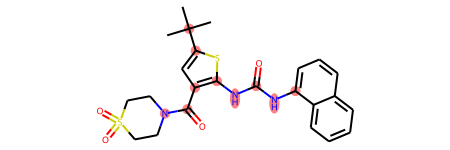

In [22]:
print(_1ww_mol.GetSubstructMatches(substructure))
_1ww_mol

In [101]:
def HDonors_in_substructure(mol, subs):
    HDonor_atoms = mol.GetSubstructMatches(Lipinski.HDonorSmarts)
    if HDonor_atoms == ():
        return 0
    atoms_in_substructure = mol.GetSubstructMatches(subs)[0]
    count = 0
    for HDonor_atom in HDonor_atoms:
        if HDonor_atom[0] in atoms_in_substructure:
            count += 1
    return count

def HAcceptors_in_substructure(mol, subs):
    HAcceptor_atoms = mol.GetSubstructMatches(Lipinski.HAcceptorSmarts)
    if HAcceptor_atoms == ():
        return 0
    atoms_in_substructure = mol.GetSubstructMatches(subs)[0]
    count = 0
    for HAcceptor_atom in HAcceptor_atoms:
        if HAcceptor_atom[0] in atoms_in_substructure:
            count += 1
    return count

def NHOH_in_substructure(mol, subs):
    NHOH_atoms = mol.GetSubstructMatches(Lipinski.NHOHSmarts)
    if NHOH_atoms == ():
        return 0
    atoms_in_substructure = mol.GetSubstructMatches(subs)[0]
    count = 0
    for NHOH_atom in NHOH_atoms:
        if NHOH_atom[0] in atoms_in_substructure:
            count += 1
    return count

def NumRotableBonds_NotStrict_in_substructure(mol, subs):
    RotableBonds_pairs = mol.GetSubstructMatches(Lipinski.RotatableBondSmarts)
    if RotableBonds_pairs == ():
        return 0
    atoms_in_substructure = mol.GetSubstructMatches(subs)[0]
    count = 0
    for RotableBonds_pair in RotableBonds_pairs:
        if RotableBonds_pair[0] in atoms_in_substructure and \
                RotableBonds_pair[1] in atoms_in_substructure:
            count += 1
    return count

def NumRotableBonds_minusAmides_in_substructure(mol, subs):
    patt1 = Chem.MolFromSmarts("[!$([NH]!@C(=O))&!D1&!$(*#*)]-&!@[!$([NH]!@C(=O))&!D1&!$(*#*)]")
    patt2 = Chem.MolFromSmarts("[!$(C(=O)!@[NH])&!D1&!$(*#*)]-&!@[!$(C(=O)!@[NH])&!D1&!$(*#*)]")
    RotableBonds_pairs = mol.GetSubstructMatches(patt1) + mol.GetSubstructMatches(patt2)
    if RotableBonds_pairs == ():
        return 0
    RotableBonds_pairs = set(RotableBonds_pairs)
    atoms_in_substructure = mol.GetSubstructMatches(subs)[0]
    count = 0
    for RotableBonds_pair in RotableBonds_pairs:
        if RotableBonds_pair[0] in atoms_in_substructure and \
                RotableBonds_pair[1] in atoms_in_substructure:
            count += 1
    return count

def NumRotableBonds_minusAmides(mol):
    patt1 = Chem.MolFromSmarts("[!$([NH]!@C(=O))&!D1&!$(*#*)]-&!@[!$([NH]!@C(=O))&!D1&!$(*#*)]")
    patt2 = Chem.MolFromSmarts("[!$(C(=O)!@[NH])&!D1&!$(*#*)]-&!@[!$(C(=O)!@[NH])&!D1&!$(*#*)]")
    RotableBonds_pairs = mol.GetSubstructMatches(patt1) + mol.GetSubstructMatches(patt2)
    if RotableBonds_pairs == ():
        return 0
    RotableBonds_pairs = set(RotableBonds_pairs)
    return len(RotableBonds_pairs)

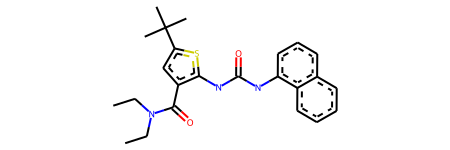

In [24]:
mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
mcs_mol.UpdatePropertyCache(strict=False)
Chem.GetSymmSSSR(mcs_mol)
mcs_mol

In [26]:
NumRotableBonds_in_substructure(zes_mol, mcs_mol)

7

In [28]:
Lipinski.NumRotatableBonds(_1ww_mol)

3

In [68]:
from rdkit.Chem import rdMolDescriptors
rdMolDescriptors.CalcNumRotatableBonds(zes_mol,
                                       strict = rdMolDescriptors.NumRotatableBondsOptions.Strict)

3

In [57]:
patt1 = Chem.MolFromSmarts("[!$([NH]!@C(=O))&!D1&!$(*#*)]-&!@[!$([NH]!@C(=O))&!D1&!$(*#*)]")
patt2 = Chem.MolFromSmarts("[!$(C(=O)!@[NH])&!D1&!$(*#*)]-&!@[!$(C(=O)!@[NH])&!D1&!$(*#*)]")

((1, 4), (6, 7), (7, 9))


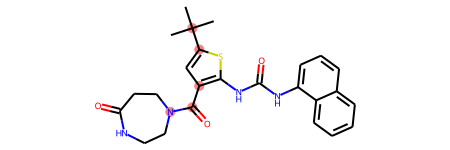

In [86]:
set1=zes_mol.GetSubstructMatches(patt1)
print(set1)
zes_mol

((1, 4), (6, 7), (7, 9), (17, 18), (21, 22))


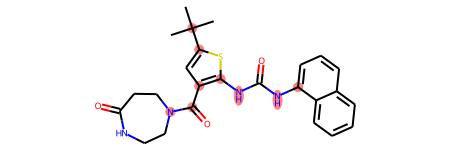

In [87]:
set2=zes_mol.GetSubstructMatches(patt2)
print(set2)
zes_mol

In [2]:
df = pd.read_csv('../data/rmsd_values_featurized.csv')

PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='smiles_template', molCol='mol_template')
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='smiles_docked', molCol='mol_docked')

,template,docked,rmsd,mol_template,mol_docked
189,1EL3_I84,2IQ0_6NA,10.238,,
3813,2CMF_F11,1GQR_SAF,10.536,,
3820,2CMF_F11,2ACK_EDR,11.194,,
4110,6H12_FJK,1GPN_HUB,11.827,,
4130,6H12_FJK,3ZV7_NHG,15.567,,
4307,2CKM_AA7,3ZV7_NHG,13.073,,
4336,1H23_E12,2ACK_EDR,12.074,,
4347,1H22_E10,2VJC_CHH,10.498,,
4360,1H22_E10,2ACK_EDR,12.311,,
4439,6G1W_E0Z,1GQR_SAF,11.684,,

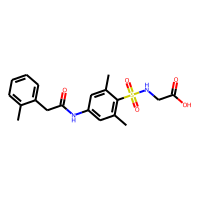
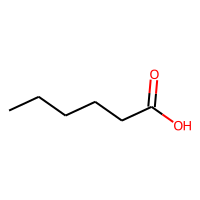
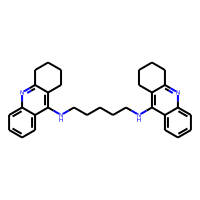
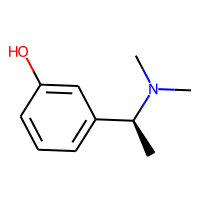
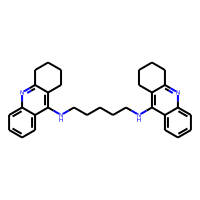
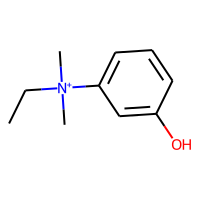
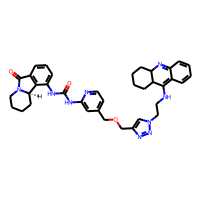
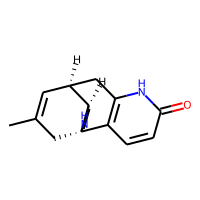
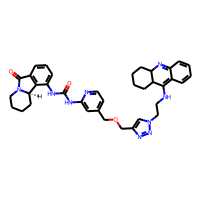
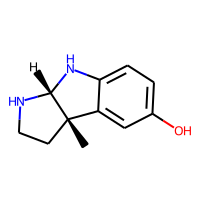
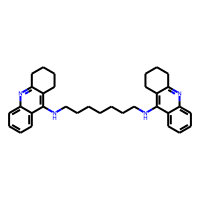
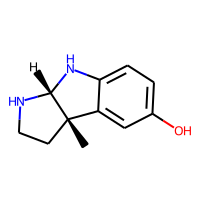
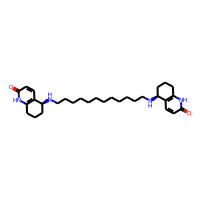
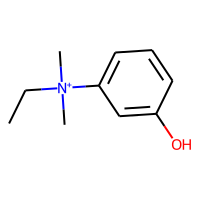
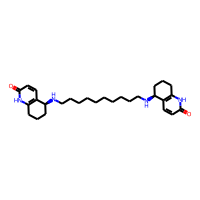
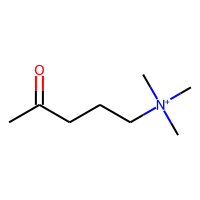
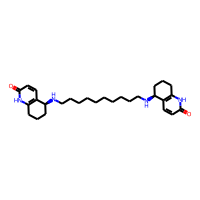
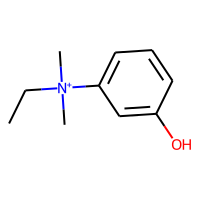
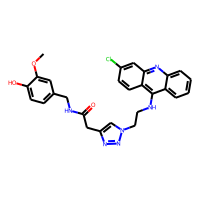
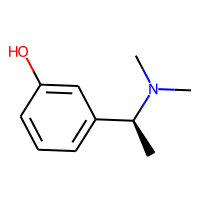
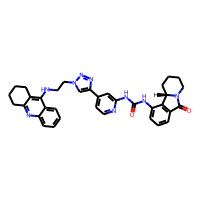
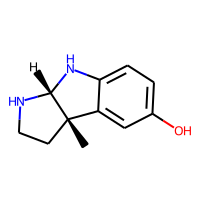
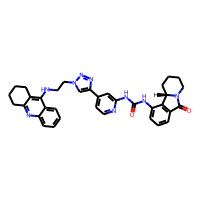
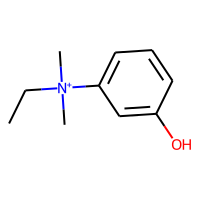
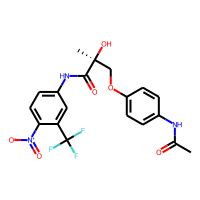
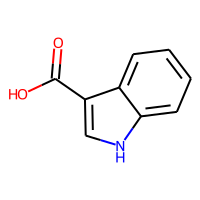
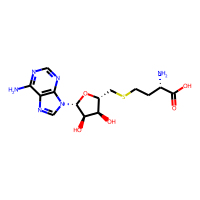
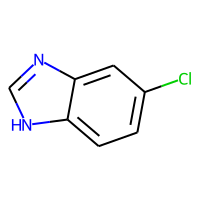
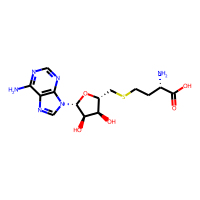
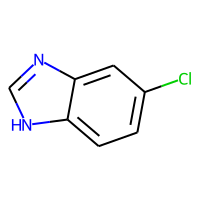
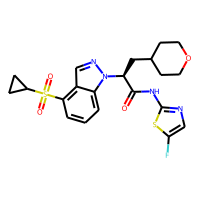
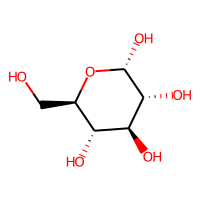
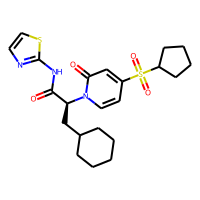
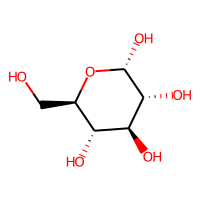
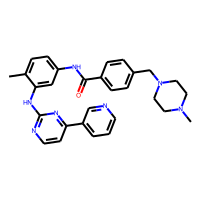
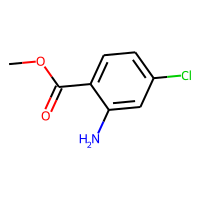
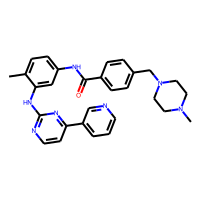
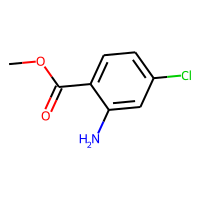

In [9]:
df.loc[(df['template_HeavyAtomCount']/2.5 > df['docked_HeavyAtomCount']) &
       (df['rmsd']>10)][
    ['template','docked','rmsd','mol_template', 'mol_docked']]

